In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, IBMQ, Aer, __qiskit_version__
from qiskit.circuit.library import QFT, GraphState, GroverOperator
from qiskit.qasm import pi
import numpy as np

from src.utils import *
from qiskit_nature.drivers import Molecule

from src.utils import get_examplary_max_cut_qp
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.compiler import transpile

In [2]:
qp = get_examplary_max_cut_qp(3)
sim = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=123)

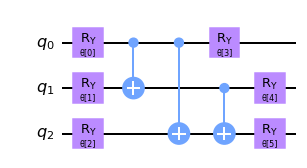

In [3]:
ansatz =  TwoLocal(3, 'ry', 'cx', 'full', reps=1)
#ansatz = RealAmplitudes(3, reps=2)
ansatz.decompose().draw(output="mpl", filename="flow_0")

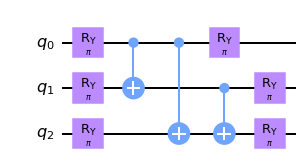

In [4]:
qc = ansatz.assign_parameters([np.pi, np.pi ,np.pi ,np.pi ,np.pi ,np.pi])
qc.decompose().draw(output="mpl", filename="flow_1")

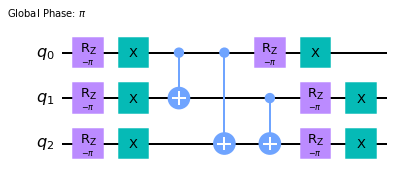

In [5]:
qc_2 = transpile(qc, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'], optimization_level=1)
qc_2.draw(output="mpl", filename="flow_2")

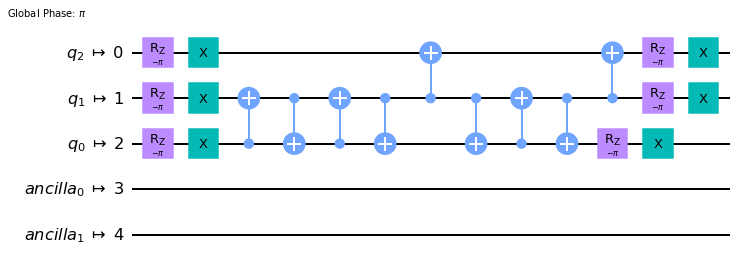

In [6]:
c_map = select_c_map("ibm", True, 3)
qc_3 = get_compiled_circuit(qc,opt_level=1, c_map=c_map)
qc_3.draw(output="mpl", filename="flow_3")

In [7]:
ibm_native_gates = FakeMontreal().configuration().basis_gates
ibm_native_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [8]:
vqe = VQE(ansatz, optimizer=SLSQP(), quantum_instance=sim)
vqe_optimizer = MinimumEigenOptimizer(vqe)
vqe_result = vqe_optimizer.solve(qp)
qc = vqe.get_optimal_circuit()

qc.name="VQE"

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_5146/2067824175.py:4: DeprecationWarning: 
The VQE.get_optimal_circuit method is deprecated as of Qiskit Terra
0.18.0 and will be removed no sooner than 3 months after the releasedate.
This information is part of the returned result object and can be
queried as VQEResult.ansatz.bind_parameters(VQEResult.optimal_point).
  qc = vqe.get_optimal_circuit()


In [9]:
vqe.get_optimal_vector()

/var/folders/f4/n3_mnvbd6q50h0gtzy84vyn40000gn/T/ipykernel_5146/843297991.py:1: DeprecationWarning: 
The VQE.get_optimal_vector method is deprecated as of Qiskit Terra 0.18.0
and will be removed no sooner than 3 months after the releasedate.
This information is part of the returned result object and can be
queried as VQEResult.eigenvector.
  vqe.get_optimal_vector()


{'000': 0.0625,
 '001': 0.04419417382415922,
 '010': 0.6577364118702871,
 '011': 0.04419417382415922,
 '100': 0.13975424859373686,
 '101': 0.0625,
 '110': 0.7322109071162488}